In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv(r"C:\Users\AbhilashKY\workoopolis\Bank customer churn\Churn_Modelling.csv")
data

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


CustomerId: A unique identifier for each customer. This is typically used as a reference to identify and distinguish customers within the dataset.

Surname: The last name of the customer. This can be used for demographic analysis or customer identification but is not typically used in predictive modeling directly.

CreditScore: A numerical value that represents the customer's creditworthiness. Higher credit scores indicate lower credit risk, while lower scores indicate higher risk.

Geography: The geographical location or region of the customer. This can be used to analyze regional patterns or trends in customer behavior.

Gender: The gender of the customer, typically represented as 'Male' or 'Female'. This can be used for demographic analysis and to understand gender-related trends.

Age: The age of the customer. Age is an important demographic factor that can influence customer behavior and preferences.

Tenure: The number of years the customer has been with the bank. This can be an indicator of customer loyalty and satisfaction.

Balance: The current balance in the customer's bank account(s). This reflects the financial status of the customer and can be an important factor in predicting churn.

NumOfProducts: The number of products the customer has with the bank (e.g., savings account, checking account, credit card). This indicates the depth of the customer's relationship with the bank.

HasCrCard: Indicates whether the customer has a credit card with the bank (1 if the customer has a credit card, 0 otherwise). This can be related to the customer's credit usage and relationship with the bank.

IsActiveMember: Indicates whether the customer is an active member of the bank (1 if active, 0 otherwise). Active members are generally more engaged with the bank's services.

EstimatedSalary: The estimated annual salary of the customer. This can be used to assess the customer's earning potential and financial stability.

Exited: A binary variable indicating whether the customer has churned (1 if the customer has exited the bank, 0 if the customer is still with the bank). This is the target variable in a churn prediction model.

In [4]:
data.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [5]:
data.shape

(10000, 14)

In [6]:
data.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [7]:
data.duplicated().sum()

0

In [8]:
data.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [10]:
#Checking the no of unique values
for i in data.columns:
    print(data[i].value_counts())
    print('\n')

RowNumber
1        1
6671     1
6664     1
6665     1
6666     1
        ..
3334     1
3335     1
3336     1
3337     1
10000    1
Name: count, Length: 10000, dtype: int64


CustomerId
15634602    1
15667932    1
15766185    1
15667632    1
15599024    1
           ..
15599078    1
15702300    1
15660735    1
15671390    1
15628319    1
Name: count, Length: 10000, dtype: int64


Surname
Smith       32
Scott       29
Martin      29
Walker      28
Brown       26
            ..
Izmailov     1
Bold         1
Bonham       1
Poninski     1
Burbidge     1
Name: count, Length: 2932, dtype: int64


CreditScore
850    233
678     63
655     54
705     53
667     53
      ... 
404      1
351      1
365      1
417      1
419      1
Name: count, Length: 460, dtype: int64


Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64


Gender
Male      5457
Female    4543
Name: count, dtype: int64


Age
37    478
38    477
35    474
36    456
34    447
     ... 
92      2
82  

From the above observation we can remove columns rownumber and customerid as they contain only the ids and removing them will not affect the prediction. And also droping the column surname since it is not useful for the model prediction 

In [12]:
data.drop(columns=['RowNumber','CustomerId','Surname'], axis = 1, inplace = True)

In [13]:
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [14]:
cat = [i for i in data.dtypes.index if data.dtypes[i]=='object']

In [15]:
num = [i for i in data.dtypes.index if data.dtypes[i]!='object']

In [16]:
num

['CreditScore',
 'Age',
 'Tenure',
 'Balance',
 'NumOfProducts',
 'HasCrCard',
 'IsActiveMember',
 'EstimatedSalary',
 'Exited']

In [17]:
data.nunique().to_frame('No Of Unique Values')

,No Of Unique Values
CreditScore,460
Geography,3
Gender,2
Age,70
Tenure,11
Balance,6382
NumOfProducts,4
HasCrCard,2
IsActiveMember,2
EstimatedSalary,9999


In [18]:
# statistical summary of data frame
data.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


Exited
0    7963
1    2037
Name: count, dtype: int64


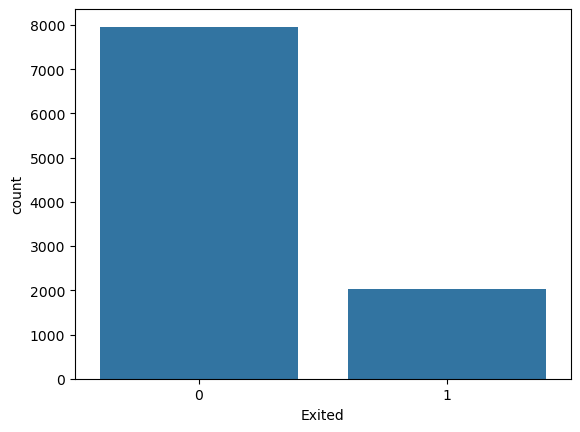

In [19]:
#Visulaizing the count of Churned customers
ax = sns.countplot(x = 'Exited', data =data)
print(data['Exited'].value_counts())

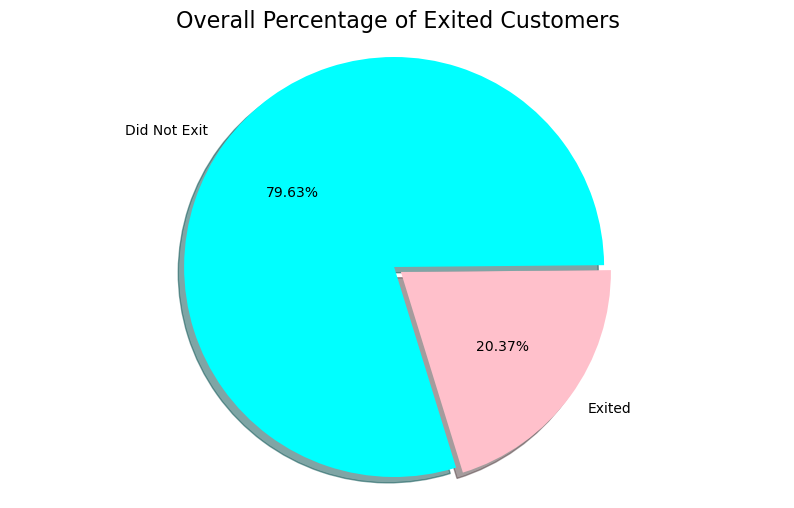

In [20]:
labels = ['Did Not Exit', 'Exited']
sizes = [data.Exited[data['Exited']==0].count(), data.Exited[data['Exited']==1].count()]
fig1, ax1 = plt.subplots(figsize=(10, 6))
ax1.pie(sizes, colors = ['cyan','pink'],explode=[0.02, 0.02], labels=labels, autopct='%1.2f%%',
        shadow=True, startangle=0.5)
ax1.axis('equal')
plt.title("Overall Percentage of Exited Customers", size = 16)
plt.show()

From the above pie chart we can that out of all the data we have only 20.37% have churned out from the bank and 79.63% are staying wth the bank 

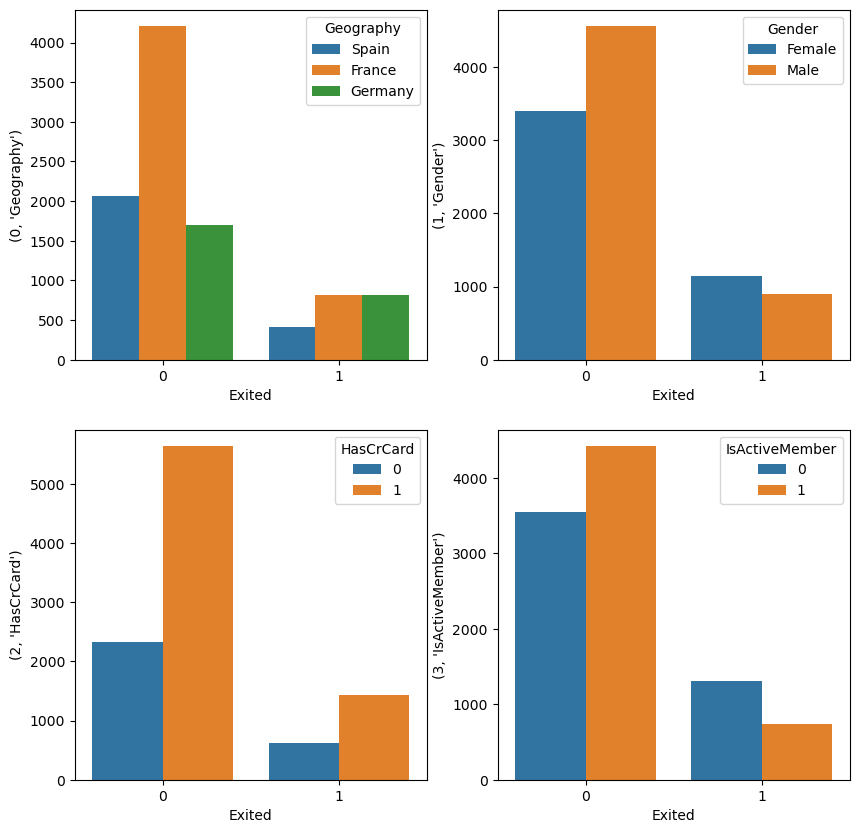

In [22]:
#Checking the relationship between target variable and other columns
categ = ['Geography','Gender','HasCrCard','IsActiveMember']
plt.figure(figsize = (10,10))
c = 1
for i in enumerate(categ):
    if c<=4:
        plt.subplot(2,2,c)
        sns.countplot(x = 'Exited',hue=i[1], data = data)
        plt.xlabel('Exited')
        plt.ylabel(i)
        c+=1
plt.show()

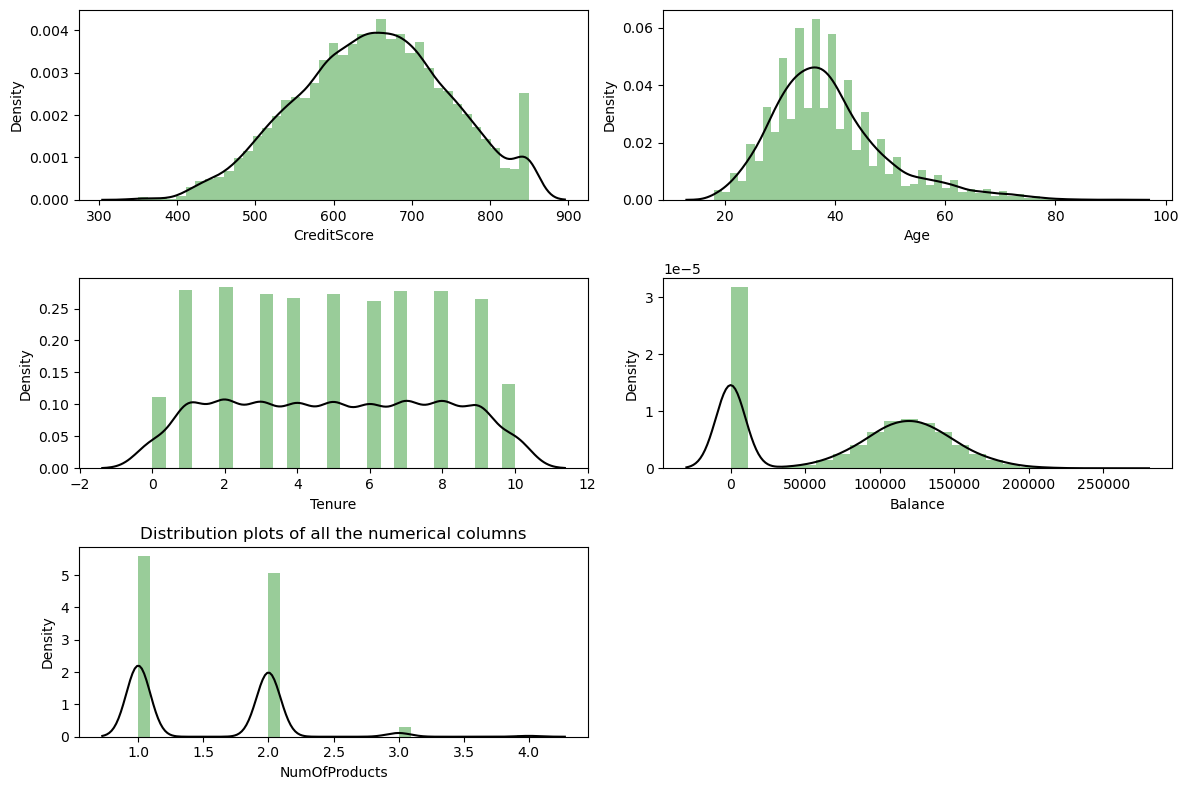

In [23]:
plt.figure(figsize = (12,8))

c = 1
for i in num:
    if c<=5:
        plt.subplot(3,2,c)
        sns.distplot(data[i],kde = True, kde_kws = {'color':'black'}, color = 'green')
        plt.xlabel(i, fontsize=10)
    c+=1
plt.title('Distribution plots of all the numerical columns')
plt.tight_layout()
        

From the above ditribution plot we can see that the data is normally distributed

In [25]:
#Checking the skewness
for i in num:
    print(i,'-',data[i].skew())

CreditScore - -0.07160660820092675
Age - 1.0113202630234552
Tenure - 0.01099145797717904
Balance - -0.14110871094154384
NumOfProducts - 0.7455678882823168
HasCrCard - -0.9018115952400578
IsActiveMember - -0.06043662833499078
EstimatedSalary - 0.0020853576615585162
Exited - 1.4716106649378211


### Bivariate Analysis

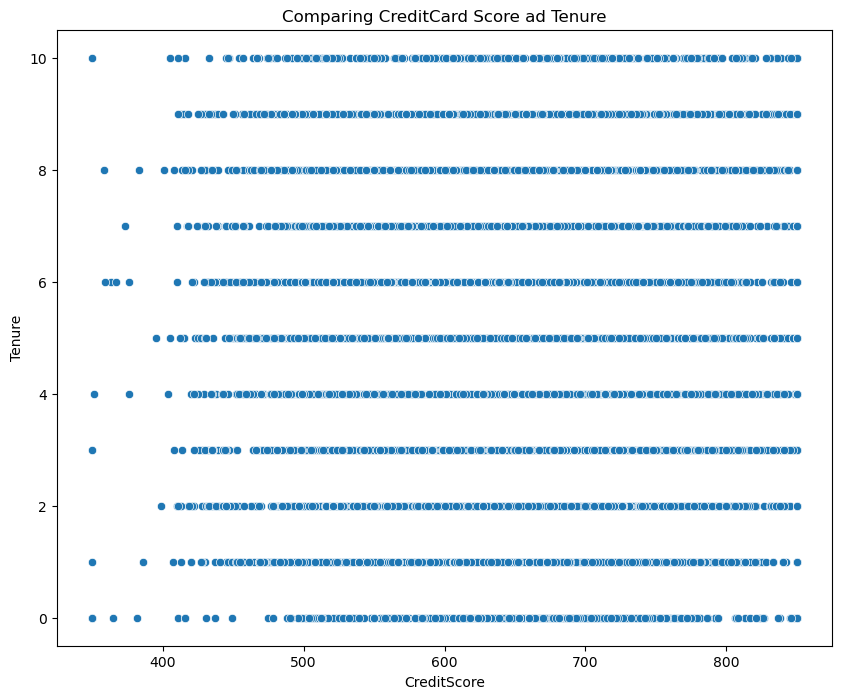

In [27]:
#Comparing between the Credit Score and Tenure
plt.figure(figsize = (10,8))
sns.scatterplot(x = 'CreditScore', y ='Tenure', data = data)
plt.title('Comparing CreditCard Score ad Tenure')
plt.show()

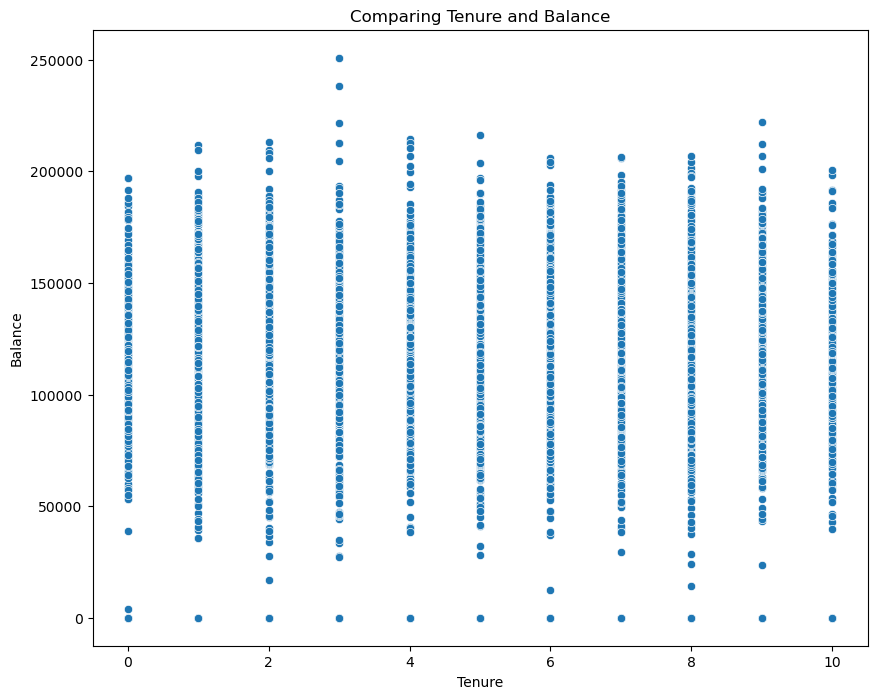

In [28]:
#Comparing between the Tenure and Balance
plt.figure(figsize = (10,8))
sns.scatterplot(x = 'Tenure', y ='Balance', data = data)
plt.title('Comparing Tenure and Balance')
plt.show() 

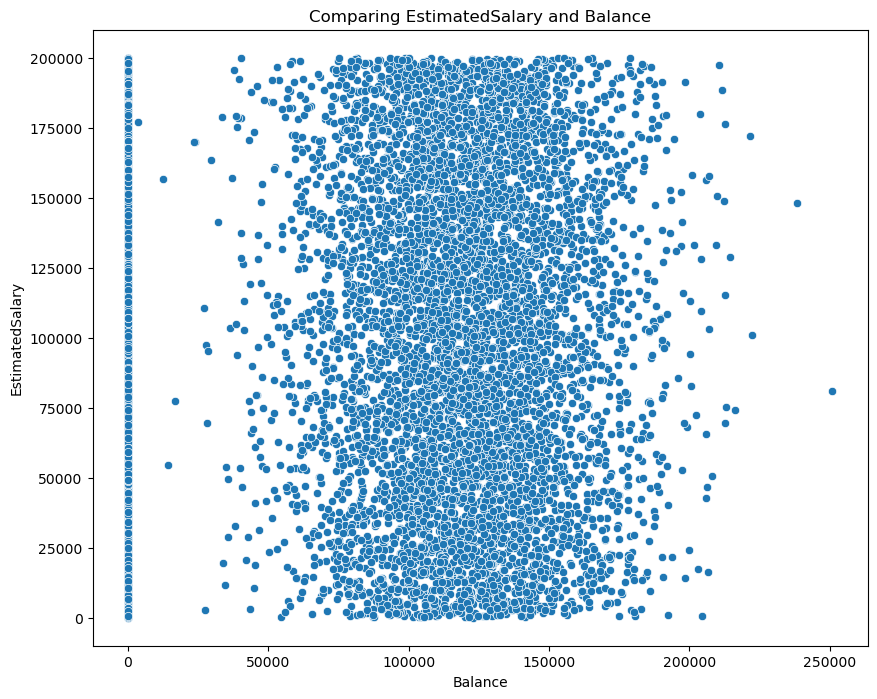

In [29]:
#Comparing between the EstimatedSalary and Balance
plt.figure(figsize = (10,8))
sns.scatterplot(y = 'EstimatedSalary', x ='Balance', data = data)
plt.title('Comparing EstimatedSalary and Balance')
plt.show() 

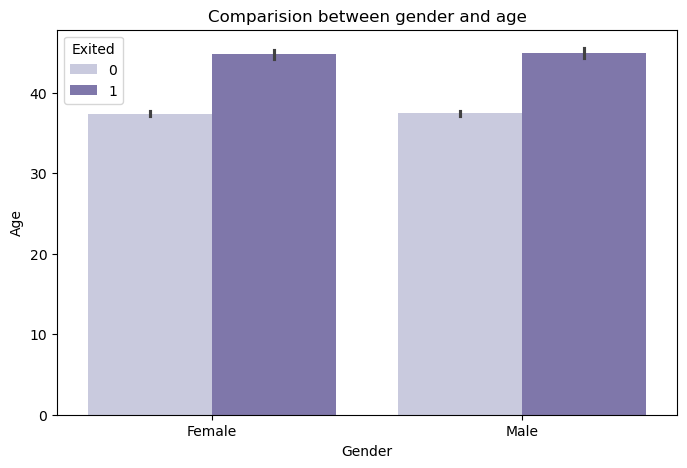

In [30]:
ax = plt.figure(figsize = (8,5))
plt.title('Comparision between gender and age')
sns.barplot(x = 'Gender', y = 'Age', palette = 'Purples', data = data, hue = 'Exited')
plt.show()

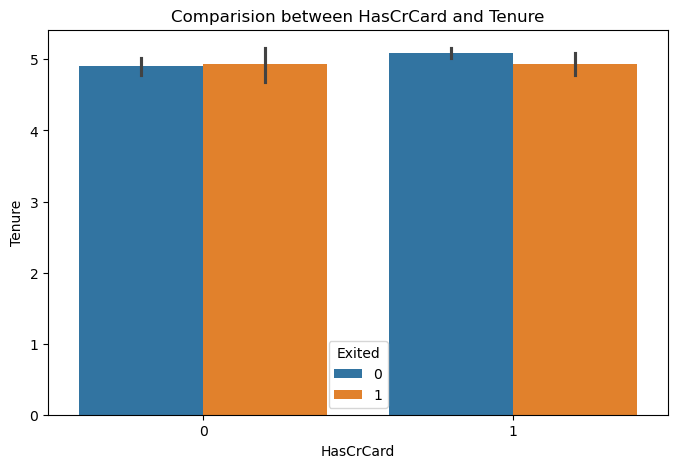

In [31]:
ax = plt.figure(figsize = (8,5))
plt.title('Comparision between HasCrCard and Tenure')
sns.barplot(x = 'HasCrCard', y = 'Tenure', data = data, hue = 'Exited')
plt.show()

### Multivariate Analysis

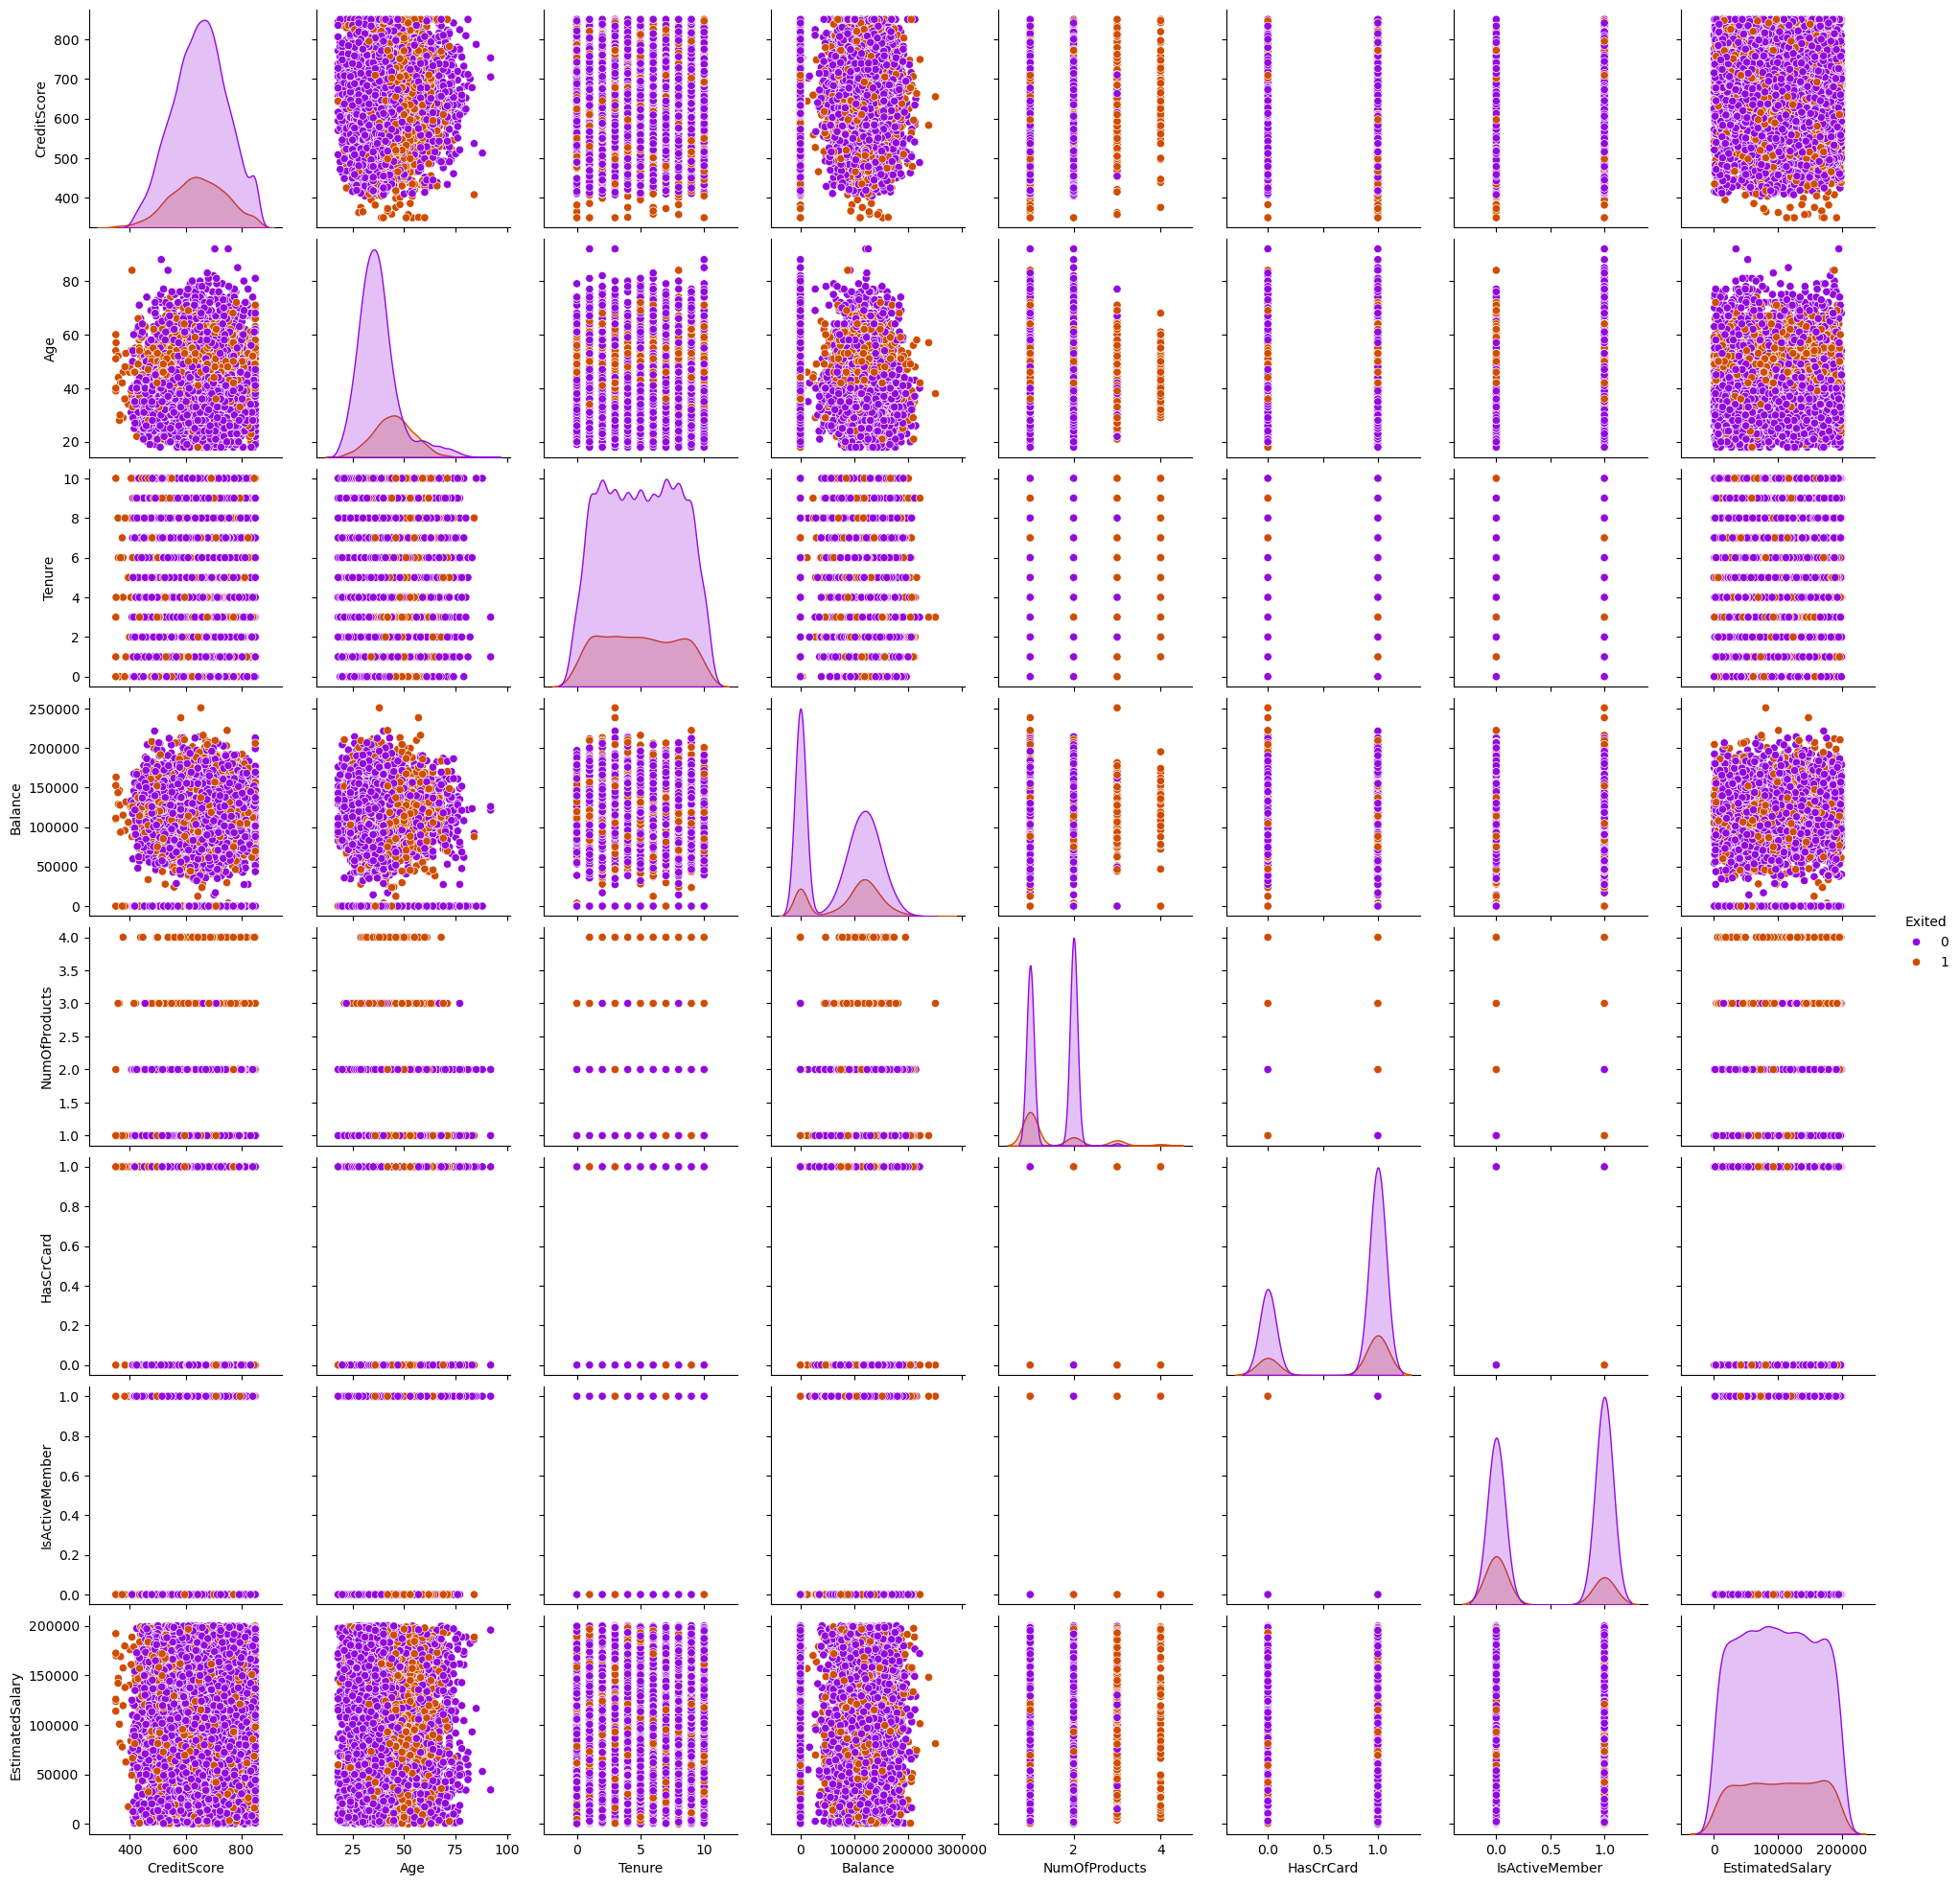

In [33]:
sns.pairplot(data, hue = 'Exited', palette = 'gnuplot')
plt.show()

From the above pair plot, we can observe that:
1. People with a credit score less than 500 are the ones leaving the bank.
2. People with an estimated salary less than 50000 are the ones leaving the bank

In [35]:
data.head(3)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1


In [36]:
numer = ['CreditScore','Age','Balance','EstimatedSalary']

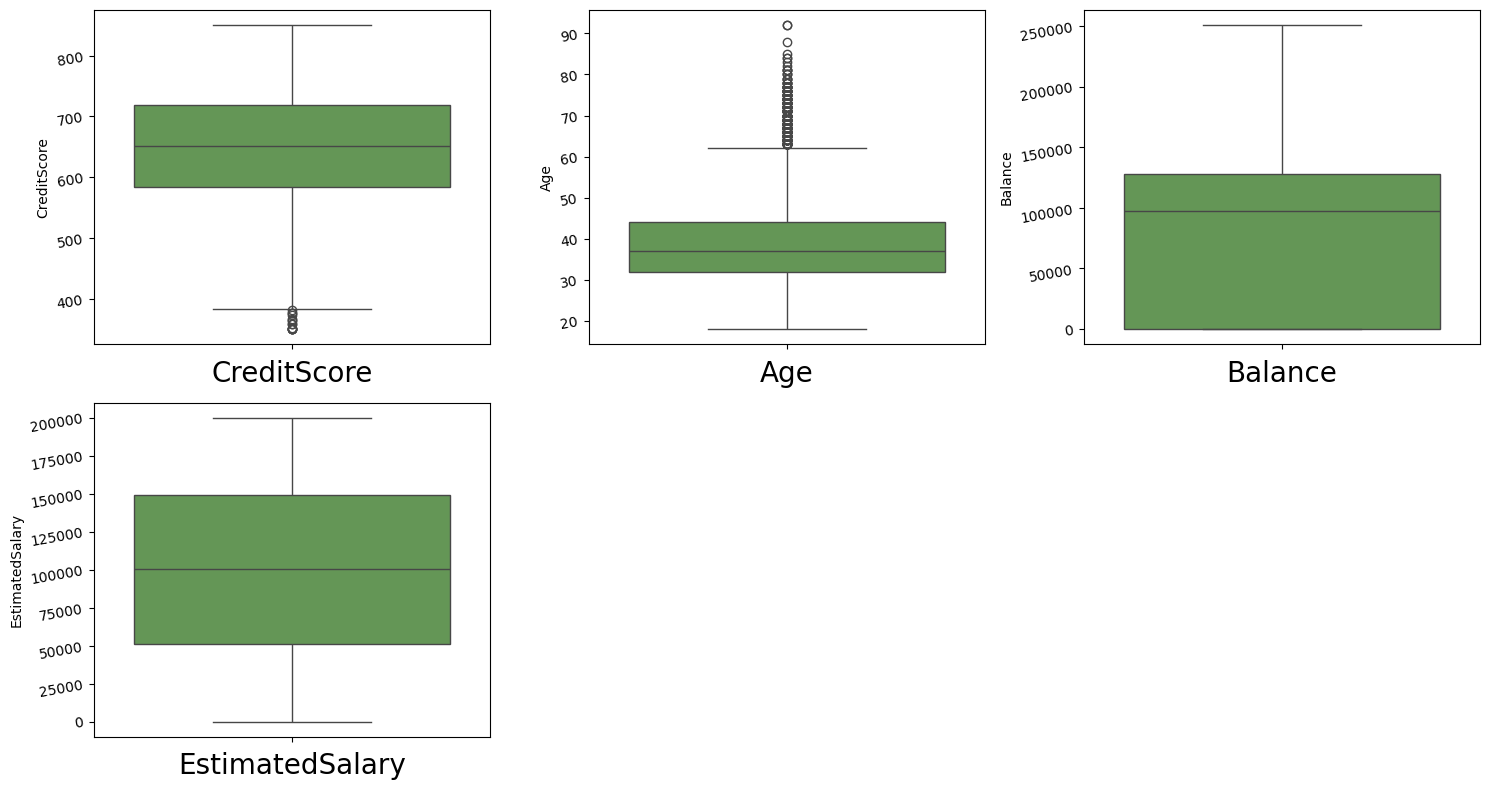

In [37]:
#check for the outliers
plt.figure(figsize = (15,8))
point= 1
for i in numer:
    if point<=5:
        ax = plt.subplot(2,3,point)
        sns.boxplot(data[i], palette = 'gist_earth')
        plt.xlabel(i, fontsize = 20)
        plt.yticks(rotation = 10, fontsize = 10)
    point+=1
plt.tight_layout()

There are outliers on the columns Age and creditscore

In [39]:
#Removing Outliers using zscore
x = data[['CreditScore','Age']]
from scipy.stats import zscore
z = np.abs(zscore(x))
z.shape

(10000, 2)

In [40]:
df = data[(z<3).all(axis = 1)]
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


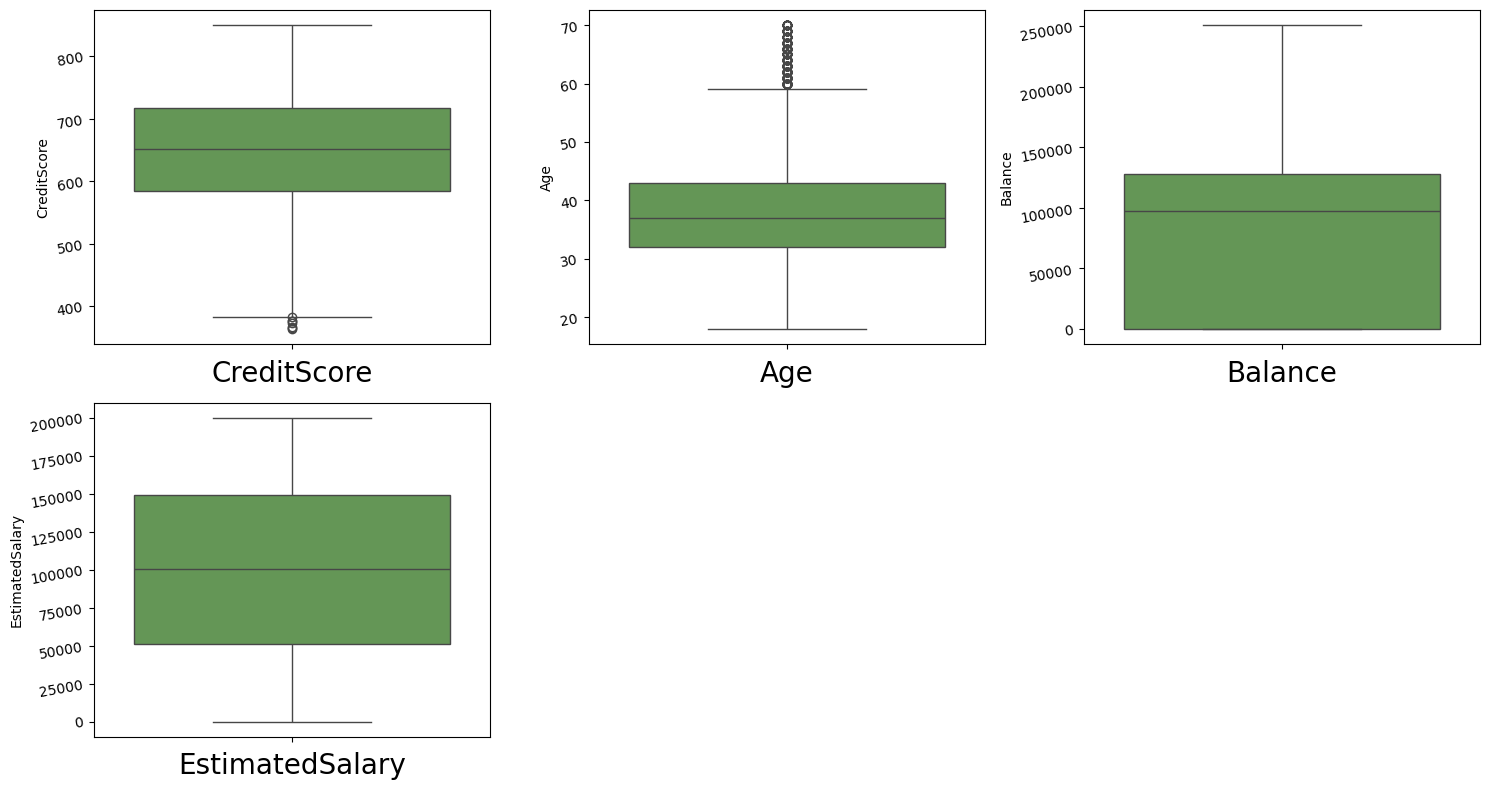

In [41]:
plt.figure(figsize = (15,8))
point= 1
for i in numer:
    if point<=5:
        ax = plt.subplot(2,3,point)
        sns.boxplot(df[i], palette = 'gist_earth')
        plt.xlabel(i, fontsize = 20)
        plt.yticks(rotation = 10, fontsize = 10)
    point+=1
plt.tight_layout()

Outliers has been minimalised

In [43]:
categorical_cols = ['Geography', 'Gender']
df = pd.get_dummies(data= df, columns = categorical_cols, dtype= int)

df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,1,0,0,1,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,0,1,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,1,0,0,1,0
3,699,39,1,0.00,2,0,0,93826.63,0,1,0,0,1,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,0,1,1,0


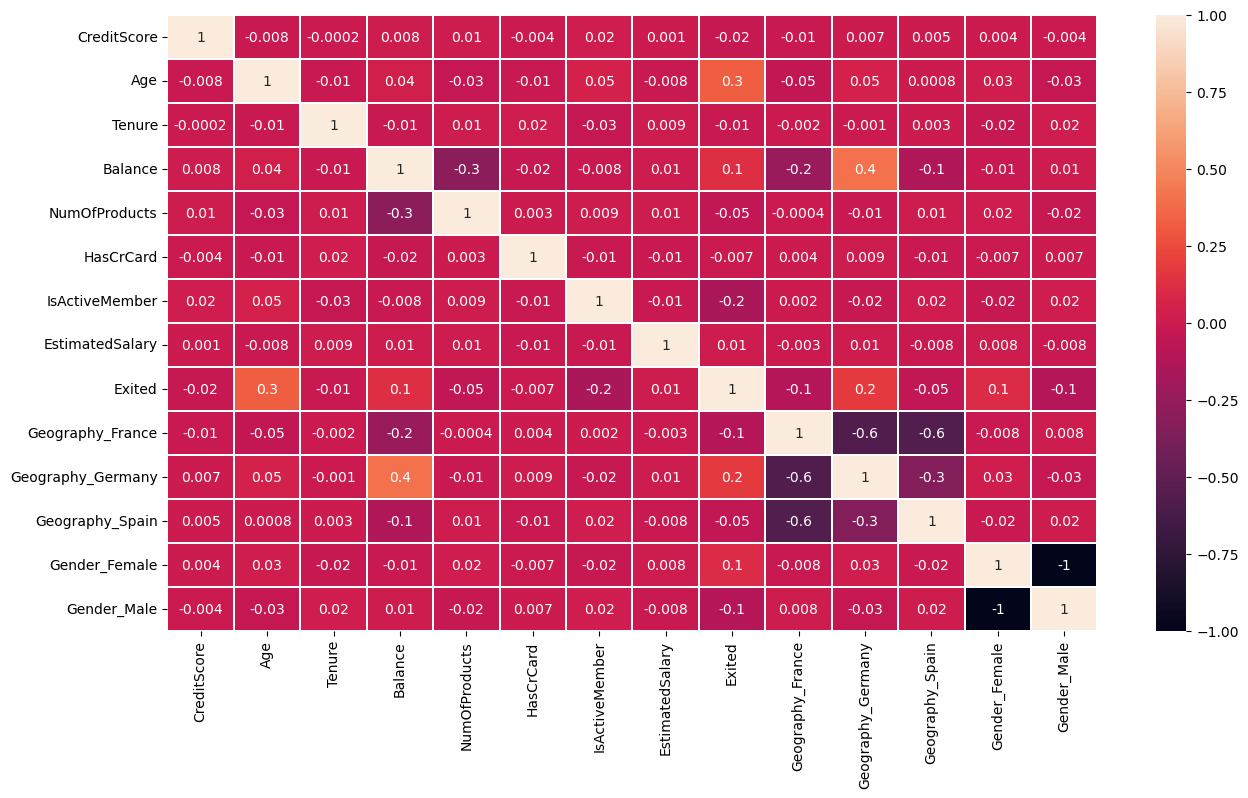

In [44]:
#Checking corelation with the target variable
cor = df.corr()
plt.figure(figsize = (15,8))
sns.heatmap(cor,linewidths = 0.1, fmt = ".1g",linecolor = "white", annot = True)
plt.yticks(rotation =   0)
plt.show()

In [45]:
df1 = df.drop(columns = 'Exited')
df1.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,1,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,1,0
3,699,39,1,0.00,2,0,0,93826.63,1,0,0,1,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,1,0


<Axes: title={'center': 'Correlation with Exited Customers'}>

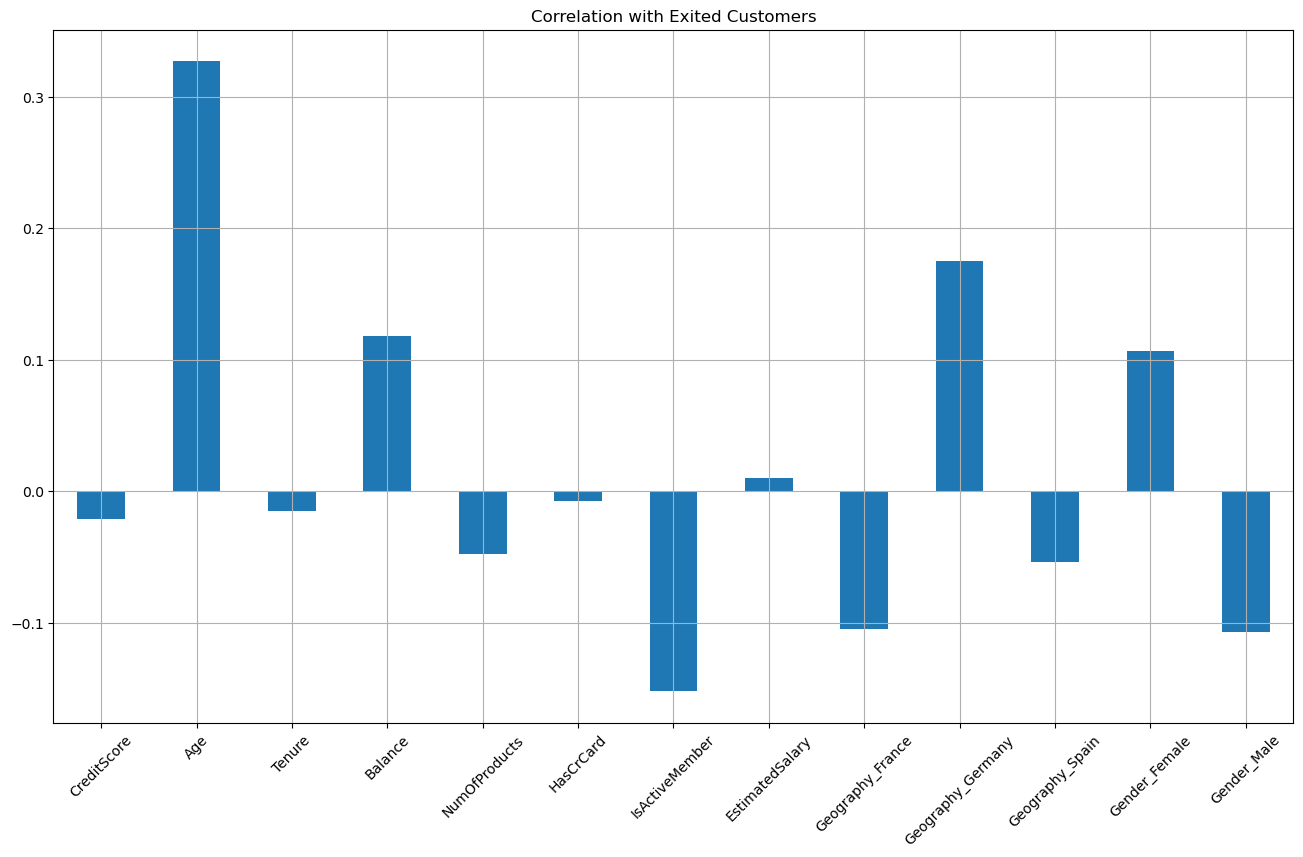

In [46]:
df1.corrwith(df['Exited']).plot.bar(figsize=(16,9),title='Correlation with Exited Customers',rot=45,grid=True)

Text(0.5, 1.0, 'Heatmap of Correlation Matrix')

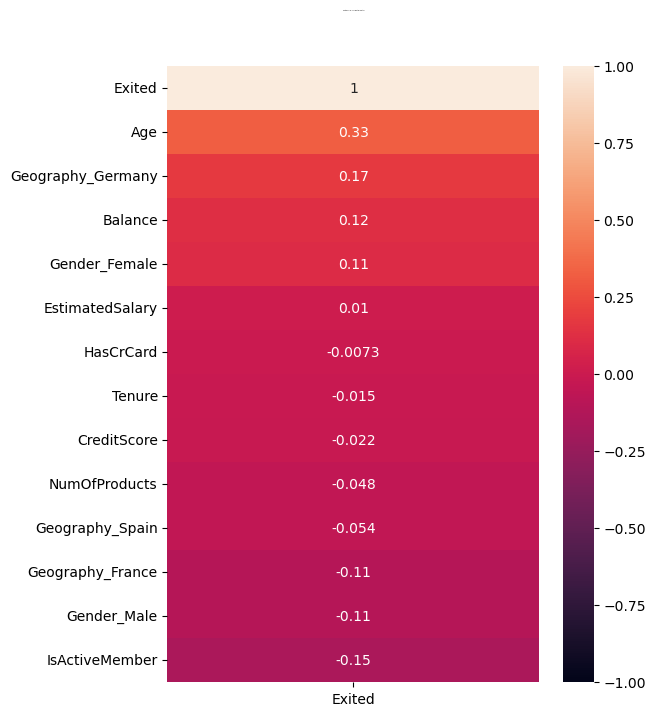

In [47]:
plt.figure(figsize=(6, 8))
heatmap = sns.heatmap(cor[['Exited']].sort_values(by='Exited', ascending=False), vmin=-1, vmax=1, annot=True,)
heatmap.set_title('Heatmap of Correlation Matrix',fontdict={'fontsize':1}, pad=40)

In [48]:
#Feature Selection using Select kbest
from sklearn.feature_selection import SelectKBest, f_classif
X = df1
y = df['Exited']
bestfeatures = SelectKBest(score_func = f_classif, k = 17)
fit= bestfeatures.fit(X,y)
df11 = pd.DataFrame(fit.scores_)
df22 = pd.DataFrame(X.columns)
features = pd.concat([df22,df11], axis=1)
features.columns = ['Feature name', 'Score']
print(features.nlargest(8,'Score'))

         Feature name        Score
1                 Age  1181.491525
9   Geography_Germany   310.985158
6      IsActiveMember   234.230313
3             Balance   138.990333
12        Gender_Male   113.885783
11      Gender_Female   113.885783
8    Geography_France   110.218823
10    Geography_Spain    28.637174


Based on the fscores we have are going to select the features 

In [50]:
#NewX
new_x = df1[['Age','Geography_Germany','IsActiveMember','Balance','Gender_Male','Gender_Female']]

In [51]:
new_x

,Age,Geography_Germany,IsActiveMember,Balance,Gender_Male,Gender_Female
0,42,0,1,0.00,0,1
1,41,0,1,83807.86,0,1
2,42,0,0,159660.80,0,1
3,39,0,0,0.00,0,1
4,43,0,1,125510.82,0,1
...,...,...,...,...,...,...
9995,39,0,0,0.00,1,0
9996,35,0,1,57369.61,1,0
9997,36,0,1,0.00,0,1
9998,42,1,0,75075.31,1,0


In [52]:
#scaling the features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [53]:
x_scaler = scaler.fit_transform(new_x)

In [54]:
#Oversampling the data SMOTE is applied on feature and target variable and not on training data
from imblearn.over_sampling import SMOTE
sm = SMOTE()
x,y = sm.fit_resample(x_scaler,y)

In [55]:
#checking value counts after oversampling
y.value_counts()

Exited
1    7841
0    7841
Name: count, dtype: int64

In [56]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
maxAccu = 0
maxRs = 0
for i in range(1,200):
    x_train,x_test, y_train, y_test = train_test_split(x,y, test_size = 0.30, random_state = i)
    rf = RandomForestClassifier()
    rf.fit(x_train,y_train)
    pred = rf.predict(x_test)
    accu = accuracy_score(y_test, pred)
    if accu>maxAccu:
        maxAccu = accu
        maxRs =i
print("Best accuracy is", maxAccu, "at random_state", maxRs)

Best accuracy is 0.8176408076514347 at random_state 197


In [57]:
#Creating train test split at maxRs
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size = 0.30, random_state = maxRs)

In [58]:
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve,accuracy_score
from sklearn.model_selection import  cross_val_score

In [59]:
# Checking accuracy score for RandomForestClassifier
rs = RandomForestClassifier()
rs.fit(x_train,y_train)
predr = rs.predict(x_test)
print((accuracy_score(y_test,predr))*100)
print(confusion_matrix(y_test, predr))
print(classification_report(y_test,predr))

81.67906482465462
[[2017  392]
 [ 470 1826]]
              precision    recall  f1-score   support

           0       0.81      0.84      0.82      2409
           1       0.82      0.80      0.81      2296

    accuracy                           0.82      4705
   macro avg       0.82      0.82      0.82      4705
weighted avg       0.82      0.82      0.82      4705



In [60]:
def metric_score(clf,x_train,x_test,y_train,y_test, train = True):
    if train:
        y_pred = clf.predict(x_train)
        print('\n--Train Result--')
        print(f"Accuracy Score:{accuracy_score(y_train,y_pred)*100 :.2f}%")
    elif train == False:
        pred = clf.predict(x_test)
        print('\n--Test result--')
        print(f"Accuracy Score:{accuracy_score(y_test, pred)*100 :.2f}%")
        
        print('\n \n Classification Report\n', classification_report(y_test,pred, digits = 2))
        print('\n ******Cross Validation******\n')
        score = cross_val_score(clf,x,y)
        print("Scores:", score)
        print("Mean of scores:", score.mean())
        print("Difference between Accuracy Score and cross validation score is - ",abs(accuracy_score(y_test, pred)-score.mean()))

#### 1.Logistic Regression

In [62]:
ls = LogisticRegression()
ls.fit(x_train,y_train)
metric_score(ls,x_train,x_test,y_train,y_test, train = True) # This is training score
metric_score(ls,x_train,x_test,y_train,y_test, train = False) # This is testing score


--Train Result--
Accuracy Score:71.70%

--Test result--
Accuracy Score:73.05%

 
 Classification Report
               precision    recall  f1-score   support

           0       0.74      0.73      0.74      2409
           1       0.72      0.73      0.72      2296

    accuracy                           0.73      4705
   macro avg       0.73      0.73      0.73      4705
weighted avg       0.73      0.73      0.73      4705


 ******Cross Validation******

Scores: [0.72521517 0.70258208 0.73533163 0.71811224 0.7244898 ]
Mean of scores: 0.7211461863993287
Difference between Accuracy Score and cross validation score is -  0.00935328225104326


#### 2.SupportVectorMachine

In [64]:
sv = SVC()
sv.fit(x_train,y_train)
metric_score(sv,x_train,x_test,y_train,y_test, train = True) 
metric_score(sv,x_train,x_test,y_train,y_test, train = False) 


--Train Result--
Accuracy Score:72.99%

--Test result--
Accuracy Score:74.56%

 
 Classification Report
               precision    recall  f1-score   support

           0       0.74      0.79      0.76      2409
           1       0.76      0.70      0.73      2296

    accuracy                           0.75      4705
   macro avg       0.75      0.74      0.74      4705
weighted avg       0.75      0.75      0.75      4705


 ******Cross Validation******

Scores: [0.73063436 0.72043354 0.75127551 0.72799745 0.73405612]
Mean of scores: 0.7328793961798937
Difference between Accuracy Score and cross validation score is -  0.012710401907247593


#### 3.Gradient Boosting Classifier

In [66]:
gd = GradientBoostingClassifier()
gd.fit(x_train,y_train)
metric_score(gd,x_train,x_test,y_train,y_test, train = True) 
metric_score(gd,x_train,x_test,y_train,y_test, train = False)


--Train Result--
Accuracy Score:77.71%

--Test result--
Accuracy Score:79.09%

 
 Classification Report
               precision    recall  f1-score   support

           0       0.79      0.81      0.80      2409
           1       0.79      0.77      0.78      2296

    accuracy                           0.79      4705
   macro avg       0.79      0.79      0.79      4705
weighted avg       0.79      0.79      0.79      4705


 ******Cross Validation******

Scores: [0.735416   0.75581766 0.80133929 0.78093112 0.78667092]
Mean of scores: 0.7720349978531419
Difference between Accuracy Score and cross validation score is -  0.01882578854430761


#### 4.KNN Classifier

In [68]:

from sklearn.neighbors import KNeighborsClassifier 
#Instantiate KNNClassifier
knn = KNeighborsClassifier()
knn.fit(x_train,y_train)
metric_score(knn,x_train,x_test,y_train,y_test, train = True)
metric_score(knn,x_train,x_test,y_train,y_test, train = False)



--Train Result--
Accuracy Score:81.46%

--Test result--
Accuracy Score:76.92%

 
 Classification Report
               precision    recall  f1-score   support

           0       0.79      0.75      0.77      2409
           1       0.75      0.79      0.77      2296

    accuracy                           0.77      4705
   macro avg       0.77      0.77      0.77      4705
weighted avg       0.77      0.77      0.77      4705


 ******Cross Validation******

Scores: [0.74306662 0.76219318 0.78188776 0.78507653 0.78380102]
Mean of scores: 0.771205021696278
Difference between Accuracy Score and cross validation score is -  0.002023300123483174


In [69]:
rs = RandomForestClassifier()
rs.fit(x_train,y_train)
metric_score(rs,x_train,x_test,y_train,y_test, train = True)
metric_score(rs,x_train,x_test,y_train,y_test, train = False)



--Train Result--
Accuracy Score:94.45%

--Test result--
Accuracy Score:81.47%

 
 Classification Report
               precision    recall  f1-score   support

           0       0.81      0.83      0.82      2409
           1       0.82      0.79      0.81      2296

    accuracy                           0.81      4705
   macro avg       0.81      0.81      0.81      4705
weighted avg       0.81      0.81      0.81      4705


 ******Cross Validation******

Scores: [0.75454256 0.78801403 0.83482143 0.83418367 0.82557398]
Mean of scores: 0.8074271328709999
Difference between Accuracy Score and cross validation score is -  0.007238116863325317


In [70]:
gd = GradientBoostingClassifier()
gd.fit(x_train,y_train)
metric_score(gd,x_train,x_test,y_train,y_test, train = True) 
metric_score(gd,x_train,x_test,y_train,y_test, train = False)


--Train Result--
Accuracy Score:77.71%

--Test result--
Accuracy Score:79.09%

 
 Classification Report
               precision    recall  f1-score   support

           0       0.79      0.81      0.80      2409
           1       0.79      0.77      0.78      2296

    accuracy                           0.79      4705
   macro avg       0.79      0.79      0.79      4705
weighted avg       0.79      0.79      0.79      4705


 ******Cross Validation******

Scores: [0.735416   0.75581766 0.80133929 0.78093112 0.78667092]
Mean of scores: 0.7720349978531419
Difference between Accuracy Score and cross validation score is -  0.01882578854430761


In [71]:
ad = AdaBoostClassifier()
ad.fit(x_train,y_train)
metric_score(ad,x_train,x_test,y_train,y_test, train = True) 
metric_score(ad,x_train,x_test,y_train,y_test, train = False)


--Train Result--
Accuracy Score:73.23%

--Test result--
Accuracy Score:74.41%

 
 Classification Report
               precision    recall  f1-score   support

           0       0.75      0.76      0.75      2409
           1       0.74      0.73      0.74      2296

    accuracy                           0.74      4705
   macro avg       0.74      0.74      0.74      4705
weighted avg       0.74      0.74      0.74      4705


 ******Cross Validation******

Scores: [0.72425885 0.72043354 0.75605867 0.73341837 0.73596939]
Mean of scores: 0.734027761965481
Difference between Accuracy Score and cross validation score is -  0.010074257163105615


In [72]:
bg = BaggingClassifier()
bg.fit(x_train,y_train)
metric_score(bg,x_train,x_test,y_train,y_test, train = True) 
metric_score(bg,x_train,x_test,y_train,y_test, train = False)


--Train Result--
Accuracy Score:93.32%

--Test result--
Accuracy Score:81.30%

 
 Classification Report
               precision    recall  f1-score   support

           0       0.80      0.84      0.82      2409
           1       0.83      0.78      0.80      2296

    accuracy                           0.81      4705
   macro avg       0.81      0.81      0.81      4705
weighted avg       0.81      0.81      0.81      4705


 ******Cross Validation******

Scores: [0.7341409  0.79056423 0.83992347 0.83227041 0.82461735]
Mean of scores: 0.8043032713563589
Difference between Accuracy Score and cross validation score is -  0.008661659568189428


In [73]:
ex = ExtraTreesClassifier()
ex.fit(x_train,y_train)
metric_score(ex,x_train,x_test,y_train,y_test, train = True) 
metric_score(ex,x_train,x_test,y_train,y_test, train = False)


--Train Result--
Accuracy Score:94.46%

--Test result--
Accuracy Score:80.87%

 
 Classification Report
               precision    recall  f1-score   support

           0       0.80      0.83      0.82      2409
           1       0.81      0.79      0.80      2296

    accuracy                           0.81      4705
   macro avg       0.81      0.81      0.81      4705
weighted avg       0.81      0.81      0.81      4705


 ******Cross Validation******

Scores: [0.76506216 0.79470832 0.83705357 0.83003827 0.82206633]
Mean of scores: 0.8097857289233833
Difference between Accuracy Score and cross validation score is -  0.0010715950232770277


### HyperParameter Tuning

In [75]:
from sklearn.model_selection import RandomizedSearchCV as rcv
param = {
    'criterion':['gini', 'entropy'],
    'min_samples_leaf':range(5,15),
    'n_estimators' :range(1,5),
    'max_depth':range(10,20),
    'min_samples_split':range(10,15)
    
}

In [76]:
rn_search = rcv(RandomForestClassifier(), cv = 5,param_distributions = param)

In [77]:
rn_search.fit(x_train,y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': range(10, 20),
                                        'min_samples_leaf': range(5, 15),
                                        'min_samples_split': range(10, 15),
                                        'n_estimators': range(1, 5)})

In [78]:
rn_clf = rn_search.best_estimator_
rn_clf

RandomForestClassifier(criterion='entropy', max_depth=16, min_samples_leaf=10,
                       min_samples_split=12, n_estimators=4)

In [79]:
rn_clf.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=16, min_samples_leaf=10,
                       min_samples_split=12, n_estimators=4)

In [80]:
metric_score(rn_clf,x_train,x_test,y_train,y_test, train = True) # For training result

metric_score(rn_clf,x_train,x_test,y_train,y_test, train = False) # For testing result


--Train Result--
Accuracy Score:79.79%

--Test result--
Accuracy Score:76.92%

 
 Classification Report
               precision    recall  f1-score   support

           0       0.76      0.80      0.78      2409
           1       0.78      0.74      0.76      2296

    accuracy                           0.77      4705
   macro avg       0.77      0.77      0.77      4705
weighted avg       0.77      0.77      0.77      4705


 ******Cross Validation******

Scores: [0.74306662 0.75741154 0.7841199  0.76977041 0.7627551 ]
Mean of scores: 0.7634247144028157
Difference between Accuracy Score and cross validation score is -  0.005757007169979178


In [88]:
from sklearn.metrics import RocCurveDisplay

In [104]:
#All the models score Captured
ls.score(x_test,y_test)
sv.score(x_test,y_test)
ad.score(x_test,y_test)
knn.score(x_test,y_test)
rs.score(x_test,y_test)
gd.score(x_test,y_test)
bg.score(x_test,y_test)
ex.score(x_test,y_test)
print('All the models score captured')

All the models score captured


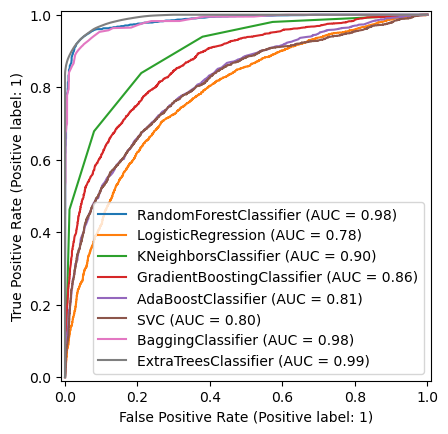

In [106]:
#Plotting the roc_curve for all the models. Here we are capturing each model's confusion matrix data. disp.ax_ is nothing but plotting the curve comparing to decisiontreeclassifier decision tree confusion matrix an

disp = RocCurveDisplay.from_estimator(rs,x_train,y_train)
RocCurveDisplay.from_estimator(ls,x_train,y_train,ax = disp.ax_)

RocCurveDisplay.from_estimator(knn,x_train,y_train,ax = disp.ax_)

RocCurveDisplay.from_estimator(gd,x_train,y_train,ax = disp.ax_)

RocCurveDisplay.from_estimator(ad,x_train,y_train,ax = disp.ax_)

RocCurveDisplay.from_estimator(sv,x_train,y_train,ax = disp.ax_)

RocCurveDisplay.from_estimator(bg,x_train,y_train,ax = disp.ax_)

RocCurveDisplay.from_estimato(ex,x_train,y_train,ax = disp.ax_)

plt.legend(prop={'size':10},loc = 'lower right')

plt.show()

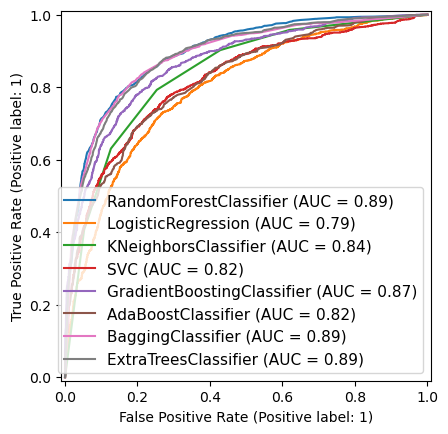

In [110]:
disp = RocCurveDisplay.from_estimator(rs,x_test,y_test)
RocCurveDisplay.from_estimator(ls,x_test,y_test,ax = disp.ax_)

RocCurveDisplay.from_estimator(knn,x_test,y_test,ax = disp.ax_)

RocCurveDisplay.from_estimator(sv,x_test,y_test,ax = disp.ax_)

RocCurveDisplay.from_estimator(gd,x_test,y_test,ax = disp.ax_)

RocCurveDisplay.from_estimator(ad,x_test,y_test,ax = disp.ax_)

RocCurveDisplay.from_estimator(bg,x_test,y_test,ax = disp.ax_)

RocCurveDisplay.from_estimator(ex,x_test,y_test,ax = disp.ax_)
plt.legend(prop={'size':11},loc = 'lower right')

plt.show()

In [112]:
#Saving the model
import joblib
joblib.dump(rn_clf,"Bank_customer_churn.joblib")

['Bank_customer_churn.joblib']

In [114]:
#predicting the saved model
model = joblib.load("Bank_customer_churn.joblib")

#prediction
prediction = model.predict(x_test)
prediction

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [116]:
a = np.array(y_test)
data = pd.DataFrame()
data['Predicted'] = prediction
data['Original'] = a
data

,Predicted,Original
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
4700,1,0
4701,1,1
4702,1,1
4703,0,0


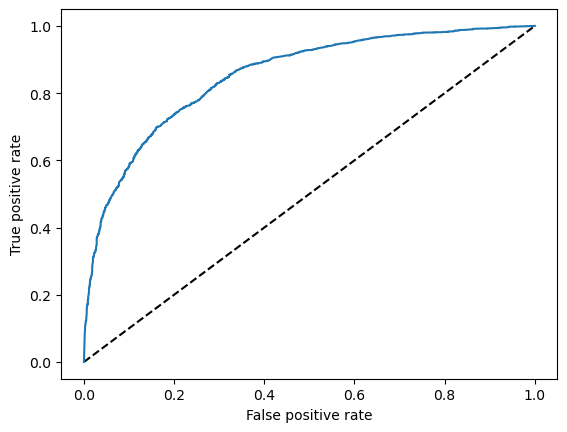

Auc score: 
 0.7684866781508946


In [122]:
from sklearn.metrics import auc, roc_auc_score,roc_curve
y_pred_prob = rn_clf.predict_proba(x_test)[:,1]
fpr,tpr,thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr,tpr)

plt.plot([0,1],[0,1], 'k--')
plt.plot(fpr,tpr, label = 'Random Classifier(area=%0.2f)'%roc_auc)
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.show()
auc_score = roc_auc_score(y_test,rn_clf.predict(x_test))
print('Auc score:','\n', auc_score)

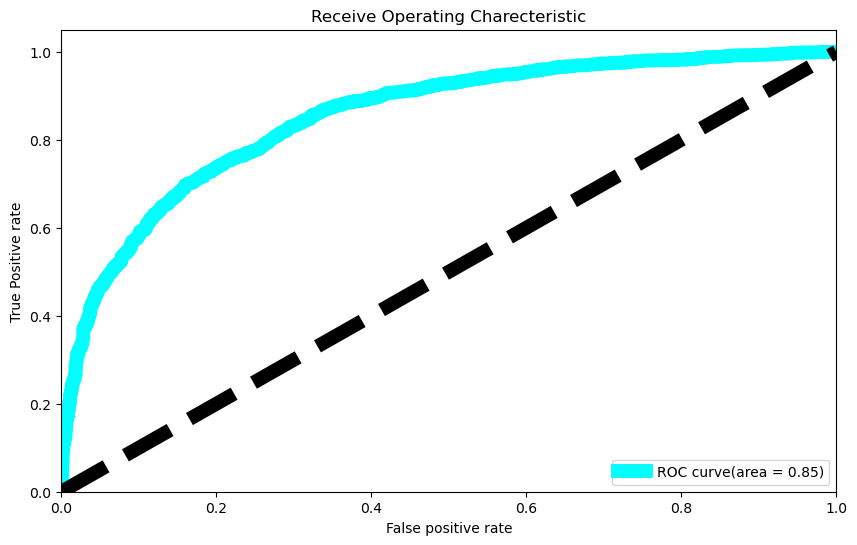

In [124]:
fpr,tpr,thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr,tpr)

plt.figure(figsize = (10,6))
plt.plot(fpr,tpr, color = 'cyan', lw = 10, label = 'ROC curve(area = %0.2f)'%roc_auc)
plt.plot([0,1],[0,1],color = 'black',lw = 10, linestyle = '--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel("False positive rate")
plt.ylabel("True Positive rate")
plt.title("Receive Operating Charecteristic")
plt.legend(loc = "lower right")
plt.show()